<div style="float:center;"><h2>GROUP:9</h2></div>

## Group members:
* Mikhaël Presley KIBINDA-MOUKENGUE
* Nazir ZUBERU
* Nokeme MEITE
* Yvan TAMDJO BIAKEU

# PCA

## file mfeat-fac

In [63]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

from bokeh.io import output_notebook, show
output_notebook()

import numpy as np
import pandas as pd

# Création des colonnes
column = ['a_'+str(i) for i in range(216)]

# Chargement
mfeat_fac = pd.read_fwf('mfeat-fac', delimiter=' ', names=column)
mfeat_fac.head()

Loading BokehJS ...

a_0  a_1  a_2  a_3  a_4  a_5  a_6  a_7  a_8  a_9  ...  a_206  a_207  a_208  \
0   98  236  531  673  607  647    2    9    3    6  ...    474    536    628   
1  121  193  607  611  585  665    7    9    2    4  ...    520    458    570   
2  115  141  590  605  557  627   12    6    3    3  ...    535    498    572   
3   90  122  627  692  607  642    0    6    4    5  ...    576    549    628   
4  157  167  681  666  587  666    8    6    1    4  ...    594    525    568   

   a_209  a_210  a_211  a_212  a_213  a_214  a_215  
0    632     18     36      8     15     12     13  
1    634     15     32     11     13     15     11  
2    656     20     35     16     14     13      6  
3    621     16     35      7     12     15      9  
4    653     16     35     10     15     13     13  

[5 rows x 216 columns]

### scale data

In [2]:
mfeat_fac_scale = (mfeat_fac - mfeat_fac.mean())/mfeat_fac.std()
mfeat_fac_scale.head()

a_0       a_1       a_2       a_3       a_4       a_5       a_6  \
0 -1.906882 -0.792545 -0.864821 -0.472519 -0.683703 -0.409280 -1.537234   
1 -1.654897 -1.185503 -0.499318 -0.924348 -1.133232 -0.204481 -1.096765   
2 -1.720632 -1.660707 -0.581075 -0.968074 -1.705360 -0.636835 -0.656297   
3 -1.994529 -1.834339 -0.403133 -0.334055 -0.683703 -0.466169 -1.713421   
4 -1.260487 -1.423105 -0.143433 -0.523532 -1.092366 -0.193103 -1.008672   

        a_7       a_8       a_9  ...     a_206     a_207     a_208     a_209  \
0 -1.274927 -1.390649 -0.747721  ... -1.295928 -0.878797 -0.233531 -0.628922   
1 -1.274927 -1.503170 -1.237387  ... -1.030655 -1.530432 -1.258526 -0.605577   
2 -1.682990 -1.390649 -1.482221  ... -0.944152 -1.196260 -1.223181 -0.348784   
3 -1.682990 -1.278128 -0.992554  ... -0.707713 -0.770191 -0.233531 -0.757318   
4 -1.682990 -1.615692 -1.237387  ... -0.603910 -0.970694 -1.293870 -0.383801   

      a_210     a_211     a_212     a_213     a_214     a_215  
0  0.044690  1.805986 -1.633457  1.175291 -0.858480 -0.097581  
1 -0.528254  1.304880 -1.123639  0.400033  0.652485 -0.528877  
2  0.426652  1.680709 -0.273942  0.787662 -0.354825 -1.607117  
3 -0.337273  1.680709 -1.803397  0.012404  0.652485 -0.960173  
4 -0.337273  1.680709 -1.293579  1.175291 -0.354825 -0.097581  

[5 rows x 216 columns]

In [3]:
mfeat_fac_scale.mean().round(), mfeat_fac_scale.std().round()

(a_0      0.0
 a_1     -0.0
 a_2      0.0
 a_3     -0.0
 a_4     -0.0
         ... 
 a_211   -0.0
 a_212    0.0
 a_213    0.0
 a_214    0.0
 a_215    0.0
 Length: 216, dtype: float64, a_0      1.0
 a_1      1.0
 a_2      1.0
 a_3      1.0
 a_4      1.0
         ... 
 a_211    1.0
 a_212    1.0
 a_213    1.0
 a_214    1.0
 a_215    1.0
 Length: 216, dtype: float64)

#### linear correlation matrix

In [4]:
corrmat = mfeat_fac_scale.corr()
corrmat

a_0       a_1       a_2       a_3       a_4       a_5       a_6  \
a_0    1.000000  0.503564  0.044639  0.281942  0.340413  0.124469  0.495113   
a_1    0.503564  1.000000  0.147405  0.216432  0.274847  0.288049  0.780144   
a_2    0.044639  0.147405  1.000000  0.055830  0.030394 -0.159355  0.181381   
a_3    0.281942  0.216432  0.055830  1.000000  0.175043  0.027913  0.031291   
a_4    0.340413  0.274847  0.030394  0.175043  1.000000  0.039995  0.118425   
...         ...       ...       ...       ...       ...       ...       ...   
a_211 -0.282642 -0.731675 -0.238297 -0.150457 -0.154928 -0.068401 -0.578317   
a_212  0.253524  0.367725  0.101528  0.264449  0.319391  0.116687  0.146659   
a_213 -0.089084 -0.376068 -0.080881 -0.038191 -0.185244 -0.046322 -0.347868   
a_214 -0.199979 -0.302331 -0.069092 -0.096970 -0.187955 -0.218200 -0.314600   
a_215  0.103426  0.065216  0.000452  0.027243 -0.158022  0.450963  0.192070   

            a_7       a_8       a_9  ...     a_206     a_207     a_208  \
a_0    0.322912  0.454491  0.368102  ...  0.278506  0.479824  0.304511   
a_1    0.646216  0.535089  0.472714  ...  0.357997  0.292552  0.168476   
a_2    0.175989  0.081639  0.116051  ...  0.539946  0.083889 -0.047854   
a_3    0.184469  0.453688  0.057276  ...  0.049961  0.502368  0.228312   
a_4    0.179999  0.463299  0.213168  ...  0.055114  0.435907  0.761068   
...         ...       ...       ...  ...       ...       ...       ...   
a_211 -0.868616 -0.413420 -0.383975  ... -0.353192 -0.197030 -0.017729   
a_212  0.304714  0.569354  0.017336  ...  0.086511  0.426755  0.361891   
a_213 -0.255007 -0.245597 -0.397400  ... -0.178799 -0.101118 -0.094534   
a_214 -0.156124 -0.250242 -0.014132  ... -0.183999 -0.074223 -0.186565   
a_215 -0.089650  0.138417 -0.086628  ...  0.105618 -0.083648 -0.027480   

          a_209     a_210     a_211     a_212     a_213     a_214     a_215  
a_0    0.064378  0.315506 -0.282642  0.253524 -0.089084 -0.199979  0.103426  
a_1    0.224692  0.341142 -0.731675  0.367725 -0.376068 -0.302331  0.065216  
a_2   -0.164081  0.049244 -0.238297  0.101528 -0.080881 -0.069092  0.000452  
a_3   -0.076025 -0.016388 -0.150457  0.264449 -0.038191 -0.096970  0.027243  
a_4   -0.039632  0.192233 -0.154928  0.319391 -0.185244 -0.187955 -0.158022  
...         ...       ...       ...       ...       ...       ...       ...  
a_211 -0.047287 -0.245379  1.000000 -0.306559  0.418448  0.170039  0.070836  
a_212  0.228091 -0.071560 -0.306559  1.000000 -0.131873 -0.230111 -0.011162  
a_213 -0.081025 -0.237976  0.418448 -0.131873  1.000000  0.134200  0.028434  
a_214 -0.181814  0.046035  0.170039 -0.230111  0.134200  1.000000 -0.081422  
a_215  0.365872 -0.163487  0.070836 -0.011162  0.028434 -0.081422  1.000000  

[216 rows x 216 columns]

#### Eigen value and eigen vector from our corrmat

In [5]:
from numpy import linalg as LA

values, vectors = LA.eig(corrmat)

eigenvalues = values
eigenvectors = vectors

#### Proportion table

In [6]:
axe = np.arange(len(values))+1
proportion = np.array([axe, eigenvalues])

In [7]:
# Proportion eigen value greater or equal than 1
proportion_dic = {'axe' : np.arange(len(values))+1,
        'eigen_values' : eigenvalues
        }
proportion = pd.DataFrame(proportion_dic)
proportion['proportion'] = proportion['eigen_values']/proportion['eigen_values'].sum()*100
proportion['pct_cumule'] = proportion['proportion'].cumsum()
proportion = proportion[proportion['eigen_values']>=1]
proportion

axe  eigen_values  proportion  pct_cumule
0     1     43.522096   20.149118   20.149118
1     2     28.570705   13.227178   33.376297
2     3     22.157010   10.257875   43.634172
3     4     15.079673    6.981330   50.615502
4     5     12.128729    5.615152   56.230654
5     6      9.825924    4.549039   60.779693
6     7      7.694444    3.562243   64.341936
7     8      6.719936    3.111081   67.453017
8     9      5.547392    2.568237   70.021254
9    10      5.074791    2.349440   72.370695
10   11      4.145765    1.919336   74.290030
11   12      3.664886    1.696707   75.986737
12   13      3.287572    1.522024   77.508761
13   14      2.819672    1.305404   78.814165
14   15      2.585991    1.197218   80.011383
15   16      2.443901    1.131436   81.142819
16   17      2.307239    1.068166   82.210985
17   18      1.933444    0.895113   83.106098
18   19      1.864231    0.863070   83.969168
19   20      1.573521    0.728482   84.697650
20   21      1.544919    0.715240   85.412890
21   22      1.484416    0.687229   86.100119
22   23      1.335299    0.618194   86.718314
23   24      1.237477    0.572906   87.291220
24   25      1.205972    0.558321   87.849540
25   26      1.073244    0.496872   88.346412
26   27      1.008022    0.466677   88.813089

We notice that, 26 axes have a eigen value greater or egal than 1. All this 26 axes allow the conservation of almost 89 percent of inertie in our data. It will not easy to analyse 26 compoments. As we know we can combine the coude rule and then take the 3 first components and get 43 percent of inertie.

#### Correlation component & variables

In [8]:
corrVarComponent= np.sqrt(eigenvalues)*eigenvectors*-1

/home/yvan_bm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [9]:
corrVarComponent = pd.DataFrame(corrVarComponent)
corrVarComponent.columns = ['F'+str(i+1) for i in range(216)]
corrVarComponent = corrVarComponent.set_index(mfeat_fac.columns)
component = ['F'+str(i+1) for i in range(proportion.shape[0])]
corrVarComponent = corrVarComponent[component]
corrVarComponent

F1        F2        F3        F4        F5        F6        F7  \
a_0    0.210823 -0.507094  0.180996  0.270048  0.195969 -0.452190 -0.144608   
a_1    0.511271 -0.688904  0.313616 -0.000383 -0.092986  0.029873 -0.182681   
a_2    0.045737 -0.183958  0.231165  0.145462  0.145703  0.178697  0.369540   
a_3   -0.024145 -0.421094 -0.161383  0.342862  0.063590 -0.014676  0.039414   
a_4   -0.047010 -0.572288 -0.279250 -0.140813  0.118171 -0.065244 -0.183670   
...         ...       ...       ...       ...       ...       ...       ...   
a_211 -0.374504  0.596105 -0.406858 -0.031651  0.228793 -0.341749 -0.070649   
a_212  0.048689 -0.523959 -0.129480  0.228571 -0.000656  0.077578 -0.230326   
a_213 -0.130717  0.354346 -0.207619  0.283633 -0.139179 -0.195286  0.017704   
a_214 -0.300762  0.269830  0.064088 -0.006332 -0.104811  0.147990  0.101596   
a_215  0.516248  0.169250 -0.167772  0.129108  0.523833  0.029559  0.187102   

             F8        F9       F10  ...       F18       F19       F20  \
a_0    0.123879  0.280049 -0.070228  ...  0.033309 -0.010263 -0.029843   
a_1   -0.019148  0.053181  0.140203  ...  0.043804 -0.060448  0.028563   
a_2   -0.301493 -0.078764 -0.270496  ... -0.005777 -0.025554 -0.175639   
a_3    0.049043  0.074324  0.111267  ...  0.285829 -0.080719 -0.191709   
a_4   -0.121370  0.248565 -0.417315  ...  0.068390  0.031606 -0.115655   
...         ...       ...       ...  ...       ...       ...       ...   
a_211  0.059385 -0.076922 -0.054706  ...  0.063300 -0.050638  0.035862   
a_212 -0.087180 -0.211536 -0.056963  ... -0.093385  0.029270 -0.086316   
a_213  0.335052 -0.000552 -0.230857  ...  0.072769 -0.144516  0.039186   
a_214  0.141154  0.298608  0.185085  ... -0.004632  0.087132 -0.071771   
a_215  0.321925 -0.096229  0.279009  ... -0.084384 -0.023998 -0.063164   

            F21       F22       F23       F24       F25       F26       F27  
a_0    0.015269  0.062326 -0.044135 -0.001713  0.007551 -0.002341 -0.010410  
a_1    0.074790  0.014961 -0.013737 -0.057604 -0.031275  0.060710 -0.042182  
a_2   -0.124247  0.154398  0.037439 -0.016047  0.178458 -0.053218 -0.037319  
a_3   -0.058230  0.052992  0.138247 -0.050480  0.217761  0.147871 -0.074257  
a_4   -0.093190 -0.042226 -0.046706 -0.075793 -0.008738  0.037497  0.057075  
...         ...       ...       ...       ...       ...       ...       ...  
a_211  0.069530 -0.037440 -0.002119 -0.129743  0.106711  0.000712  0.053013  
a_212  0.106809 -0.061305  0.030474 -0.309833  0.027638 -0.100399  0.061659  
a_213  0.045897 -0.038543  0.190826  0.028842 -0.085018  0.114857  0.027104  
a_214 -0.036537 -0.177898 -0.138782 -0.063640  0.046535 -0.152862  0.390360  
a_215 -0.028078 -0.004141  0.005569 -0.120413 -0.042416  0.043487 -0.103516  

[216 rows x 27 columns]

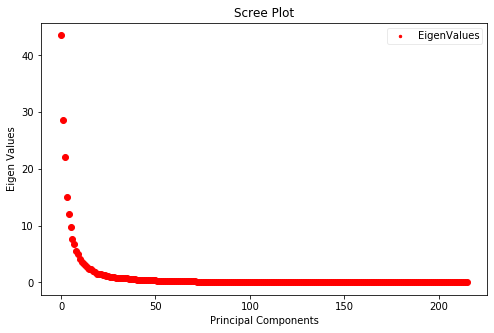

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(216)

plt.plot(sing_vals,eigenvalues, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

#### Projection of data on the two first axes

In [53]:
# Decomposition in singular value
u, s, vh = np.linalg.svd(mfeat_fac_scale.values,full_matrices=False)

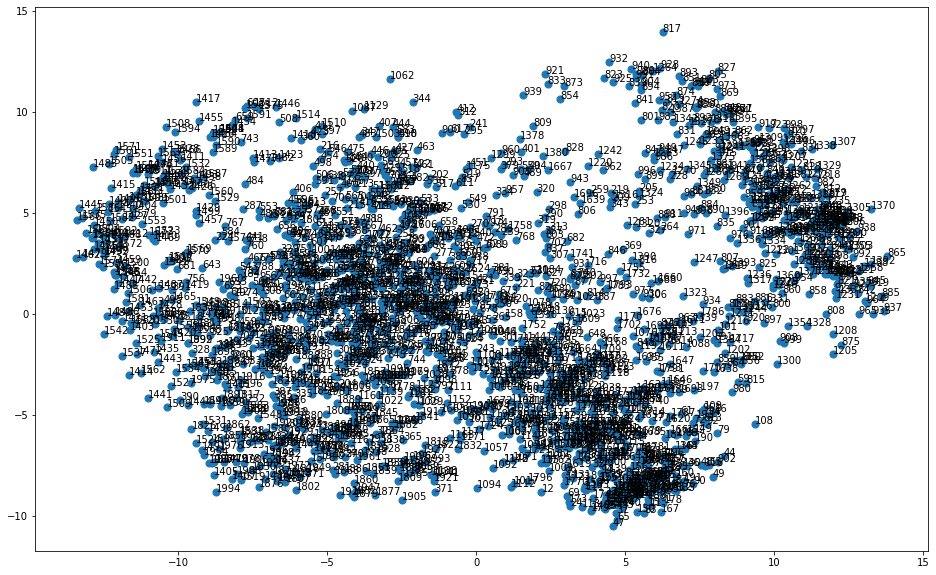

In [64]:
k=2

U_k=u[:,0:k]
D_k=np.diag(s[0:k])
V_k = vh.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=mfeat_fac.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

In [26]:
def PCA(file, delimiter, letter_column, number_column):
    # Création des colonnes
    column = [letter_column + str(i) for i in range(number_column)]

    # Chargement
    data = pd.read_fwf(file, delimiter = delimiter, names=column)
    
    # Scale data
    data_scale = (data - data.mean())/data.std()
    
    # Correlation matrix
    corrmat = data_scale.corr()
    
    # Eigen values and eigen vectors
    eigenvalues, eigenvectors = LA.eig(corrmat)
    
    # Proportion table for eigen values greater or equal than 1
    axe = np.arange(len(eigenvalues))+1
    proportion = np.array([axe, eigenvalues])
    proportion_dic = {'axe' : np.arange(len(eigenvalues))+1,
        'eigen_values' : eigenvalues
        }
    proportion = pd.DataFrame(proportion_dic)
    proportion['proportion'] = proportion['eigen_values']/proportion['eigen_values'].sum()*100
    proportion['pct_cumule'] = proportion['proportion'].cumsum()
    proportion = proportion[proportion['eigen_values']>=1]
    
    # correlation component variables
    corrVarComponent= np.sqrt(eigenvalues)*eigenvectors*-1
    corrVarComponent = pd.DataFrame(corrVarComponent)
    corrVarComponent.columns = ['F'+str(i+1) for i in range(number_column)]
    corrVarComponent = corrVarComponent.set_index(data.columns)
    component = ['F'+str(i+1) for i in range(proportion.shape[0])]
    corrVarComponent = corrVarComponent[component]
    
    
    # Decomposition in singular value
    u, s, vh = np.linalg.svd(data_scale.values,full_matrices=False)

    coordInd = pd.DataFrame(u)
    coordInd.columns = ['F'+str(i+1) for i in range(number_column)]

    source = ColumnDataSource(data=coordInd)

    p = figure(title='F1 x F2',
           x_range=Range1d(coordInd['F1'].min()-1, coordInd['F1'].max()+1),
           y_range=Range1d(coordInd['F2'].min()-1, coordInd['F2'].max()+1)
           )

    p.scatter(x='F1', y='F2', size=8, source=source)

    p.xaxis[0].axis_label = 'F1'
    p.yaxis[0].axis_label = 'F2'

    labels = LabelSet(x='F1', y='F2', text='marque', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

    p.add_layout(labels)

    # Plot segment for Fact1 & Fact2
    p.segment(x0=[0,-10], y0=[-10,0], 
          x1=[0,10] , y1=[10,0], 
          color="grey", line_width=1.5)


    return data, data_scale, corrmat, proportion, corrVarComponent, eigenvalues

## File mfeat-fou

In [28]:
data_fou, data_fou_scale, fou_corrmat, fou_proportion, fou_corrVarComponent, eigenvalues_fou = PCA('mfeat-fou',' ', 'b', 76)

In [84]:
# Proportion for eigenvalues greater or equal than 1
fou_proportion

axe  eigen_values  proportion  pct_cumule
0     1     11.871456   15.620337   15.620337
1     2      5.188408    6.826853   22.447189
2     3      4.749544    6.249401   28.696590
3     4      2.756648    3.627168   32.323758
4     5      2.535661    3.336397   35.660154
5     6      2.430012    3.197384   38.857539
6     7      2.171937    2.857812   41.715350
7     8      2.020155    2.658099   44.373450
8     9      1.903114    2.504097   46.877546
9    10      1.732323    2.279372   49.156919
10   11      1.629823    2.144504   51.301423
11   12      1.589664    2.091663   53.393086
12   13      1.496645    1.969269   55.362355
13   14      1.444788    1.901036   57.263392
14   15      1.359160    1.788369   59.051760
15   16      1.333663    1.754820   60.806580
16   17      1.203209    1.583170   62.389750
17   18      1.119473    1.472991   63.862741
18   19      1.068050    1.405329   65.268070
19   20      1.050737    1.382549   66.650619

In [85]:
fou_corrVarComponent

F1        F2        F3        F4        F5        F6        F7  \
b0  -0.518437  0.070878 -0.451269 -0.036639 -0.109753  0.186681  0.034817   
b1  -0.408906  0.360703 -0.098923  0.307008  0.258027 -0.134831 -0.187042   
b2  -0.564836  0.121259 -0.446834  0.121686 -0.056281  0.145414  0.066774   
b3   0.141780  0.213908  0.046654  0.117290  0.337483 -0.149952 -0.246975   
b4  -0.153500 -0.689892  0.120123 -0.028853 -0.107794 -0.160666  0.118681   
..        ...       ...       ...       ...       ...       ...       ...   
b71  0.457341 -0.336601 -0.015660  0.305959 -0.115538 -0.336231  0.147122   
b72 -0.567830  0.053176 -0.468166  0.278287 -0.060296  0.013608 -0.078813   
b73  0.505240 -0.101806 -0.371205  0.326403 -0.195299 -0.236576  0.069806   
b74 -0.189534  0.362070  0.016346  0.471869  0.211582  0.039244  0.128802   
b75  0.626144 -0.014652 -0.164039  0.260465  0.036743 -0.095919 -0.022213   

           F8        F9       F10       F11       F12       F13       F14  \
b0  -0.045052 -0.093875 -0.096029  0.197010  0.151918 -0.063148 -0.042732   
b1  -0.109361 -0.085389  0.162404  0.156773 -0.133166  0.309471 -0.106717   
b2  -0.016727  0.047094  0.029116 -0.102950  0.088352 -0.159933  0.033076   
b3  -0.351473 -0.093154  0.120232  0.280351 -0.103424  0.216258 -0.125811   
b4  -0.240769  0.108270  0.104887 -0.115991 -0.008830 -0.297112  0.024158   
..        ...       ...       ...       ...       ...       ...       ...   
b71 -0.218444  0.058292  0.133765 -0.178507  0.016049 -0.223057  0.009595   
b72  0.118172 -0.033134  0.075220 -0.105690 -0.135709  0.136092  0.006236   
b73 -0.249300  0.094831  0.020118 -0.007557  0.035381  0.015243 -0.030447   
b74  0.027958 -0.170985  0.074723 -0.095364  0.113046 -0.070326 -0.013810   
b75 -0.340915  0.054158  0.036999  0.070273  0.150956 -0.005706 -0.028213   

          F15       F16       F17       F18       F19       F20  
b0   0.030032  0.059325 -0.062818 -0.078015  0.156004  0.154444  
b1   0.056019  0.024242 -0.107780 -0.040096 -0.091513  0.061952  
b2  -0.038949  0.015510  0.049469 -0.027667  0.012430  0.050484  
b3   0.148119  0.049570 -0.179241  0.159405 -0.094721  0.100636  
b4  -0.092702 -0.137298 -0.050961  0.045040  0.057991 -0.058532  
..        ...       ...       ...       ...       ...       ...  
b71 -0.099355 -0.056637  0.164661 -0.060420  0.048655  0.039191  
b72 -0.062696  0.019881  0.027283 -0.097713 -0.098404  0.097316  
b73  0.059878 -0.101861  0.173782 -0.117053 -0.142416 -0.116797  
b74 -0.032884 -0.192393  0.102973  0.050376  0.118787  0.098802  
b75  0.129500 -0.106039  0.000820 -0.052357 -0.166534 -0.181632  

[76 rows x 20 columns]

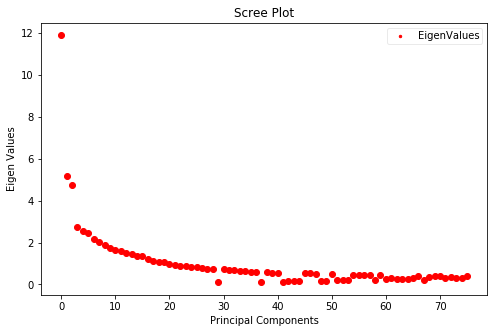

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(76)

plt.plot(sing_vals,eigenvalues_fou, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

We notice that, 20 axes have a eigen value greater or egal than 1. All this 20 axes allow the conservation of almost 67 percent of inertie in our data. It will not easy to analyse 20 compoments. As we know we can combine the coude rule and then take the 3 first components getting 29 percent of inertie.

#### Plot of data on our two first axes

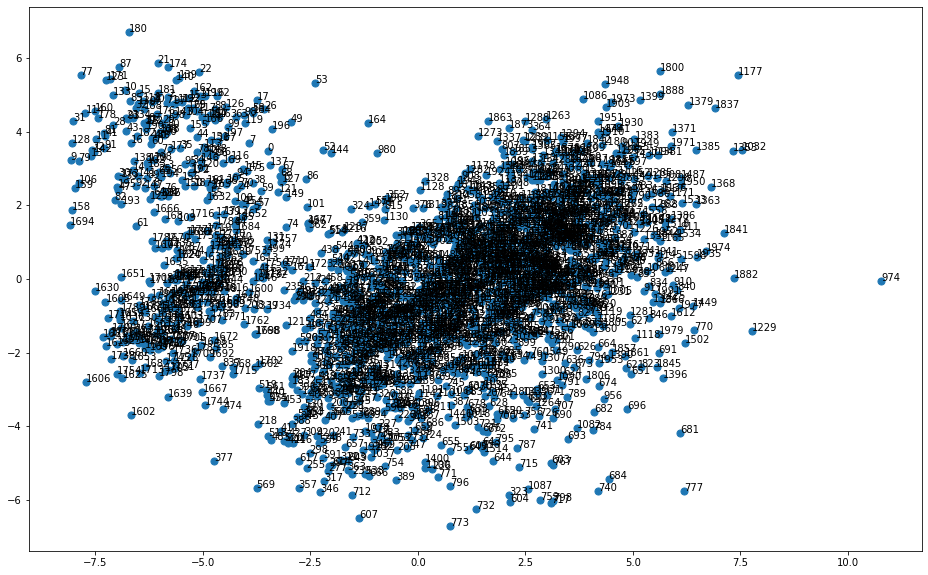

In [69]:
# Decomposition in singular value
u2, s2, vh2 = np.linalg.svd(data_fou_scale.values,full_matrices=False)

k=2

U_k=u2[:,0:k]
D_k=np.diag(s2[0:k])
V_k = vh2.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=data_fou.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

## File mfeat-kar

In [30]:
data_kar, data_kar_scale, kar_corrmat, kar_proportion, kar_corrVarComponent, eigenvalues_kar = PCA('mfeat-kar',' ', 'c', 64)

In [90]:
# Proportion with eigen value greater or equal than 1
kar_proportion

axe  eigen_values  proportion  pct_cumule
0     1      5.835493    9.117957    9.117957
1     2      4.967297    7.761401   16.879358
2     3      3.535822    5.524722   22.404080
3     4      3.224855    5.038836   27.442916
4     5      2.647539    4.136779   31.579695
5     6      2.365480    3.696063   35.275758
6     7      2.098411    3.278768   38.554526
7     8      1.910397    2.984995   41.539521
8     9      1.701969    2.659327   44.198847
9    10      1.522395    2.378742   46.577589
10   11      1.475432    2.305363   48.882952
11   12      1.413300    2.208281   51.091233
12   13      1.378572    2.154018   53.245251
13   14      1.304291    2.037955   55.283207
14   15      1.251193    1.954989   57.238196
15   16      1.160901    1.813908   59.052104
17   18      1.094299    1.709842   60.795667
18   19      1.073025    1.676602   62.472268
19   20      1.035439    1.617873   64.090141
21   22      1.009477    1.577308   65.758303

In [33]:
kar_corrVarComponent

F1        F2        F3        F4        F5        F6        F7  \
c0   0.369848 -0.438393  0.208621 -0.456556 -0.241847 -0.256832 -0.080722   
c1  -0.302022 -0.011902  0.405689 -0.116695  0.507577  0.178790  0.191360   
c2   0.178655 -0.575594 -0.095747  0.224989  0.106918 -0.058142 -0.052339   
c3  -0.028060  0.076665 -0.018128 -0.548397 -0.190573  0.026669  0.173085   
c4   0.141468  0.209394 -0.215323 -0.005160 -0.325873  0.115931  0.213932   
..        ...       ...       ...       ...       ...       ...       ...   
c59 -0.392101  0.217561 -0.085248  0.143104 -0.038827 -0.215697 -0.247385   
c60  0.081034  0.152638  0.019962  0.228460 -0.073662 -0.070100  0.036631   
c61  0.087213  0.197721 -0.242648  0.094064 -0.296635 -0.164944  0.277945   
c62  0.249348  0.173798  0.143599  0.168630  0.144242  0.193248 -0.211893   
c63 -0.486220  0.127979  0.111757  0.054229 -0.125607 -0.214093 -0.010656   

           F8        F9       F10       F11       F12       F13       F14  \
c0   0.119428 -0.020477  0.266678  0.139923 -0.044919  0.040839 -0.038627   
c1   0.209215 -0.200934  0.029914  0.190809 -0.039215  0.185724 -0.079363   
c2   0.132869 -0.095393  0.208265 -0.306858 -0.066542 -0.045360  0.025939   
c3  -0.086577 -0.195417 -0.253870 -0.256736 -0.270625  0.167735  0.266407   
c4   0.055395  0.435542 -0.192114 -0.037688 -0.273511  0.332120  0.054898   
..        ...       ...       ...       ...       ...       ...       ...   
c59 -0.135634 -0.210051 -0.005328  0.014631 -0.275264  0.131604  0.160187   
c60  0.003382  0.094706 -0.309918 -0.044623  0.027960  0.104177 -0.133287   
c61 -0.151098  0.178047  0.209643 -0.142894  0.076762  0.016296 -0.110417   
c62 -0.189008  0.018685  0.089761 -0.038835 -0.149295  0.064408  0.002995   
c63  0.003129  0.188625  0.003367 -0.075404  0.140741 -0.044844 -0.071908   

          F15       F16       F17       F18       F19       F20  
c0   0.113416  0.066538 -0.059883 -0.050234  0.105479  0.024555  
c1   0.082629  0.226974  0.072426  0.030194  0.096038 -0.065694  
c2   0.004379 -0.179673  0.021250  0.126277 -0.067094 -0.119501  
c3  -0.002456 -0.012141 -0.015066 -0.052522  0.031300  0.100878  
c4  -0.255805 -0.108810  0.026065 -0.059098  0.014817 -0.116036  
..        ...       ...       ...       ...       ...       ...  
c59  0.062271  0.148371  0.006326  0.081336  0.137799  0.000798  
c60  0.219009  0.351843  0.004987  0.257970  0.008517 -0.236622  
c61  0.147378 -0.040307 -0.005911  0.110659 -0.085037 -0.059560  
c62  0.182988  0.063728 -0.003663 -0.071828 -0.223801  0.160300  
c63 -0.034623  0.181729  0.000818 -0.220145  0.148573 -0.078555  

[64 rows x 20 columns]

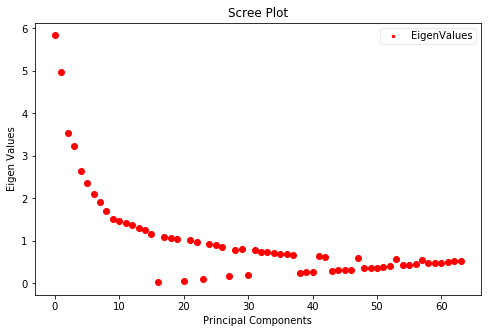

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(64)

plt.plot(sing_vals,eigenvalues_kar, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

We notice that, 22 axes have a eigen value greater or egal than 1. All this 22 axes allow the conservation of almost 66 percent of inertie in our data. It will not easy to analyse 22 compoments. As we know we can combine the coude rule and then take the 4 first components and keep 28 percent of inertie.

#### Plot of data on our two first axes

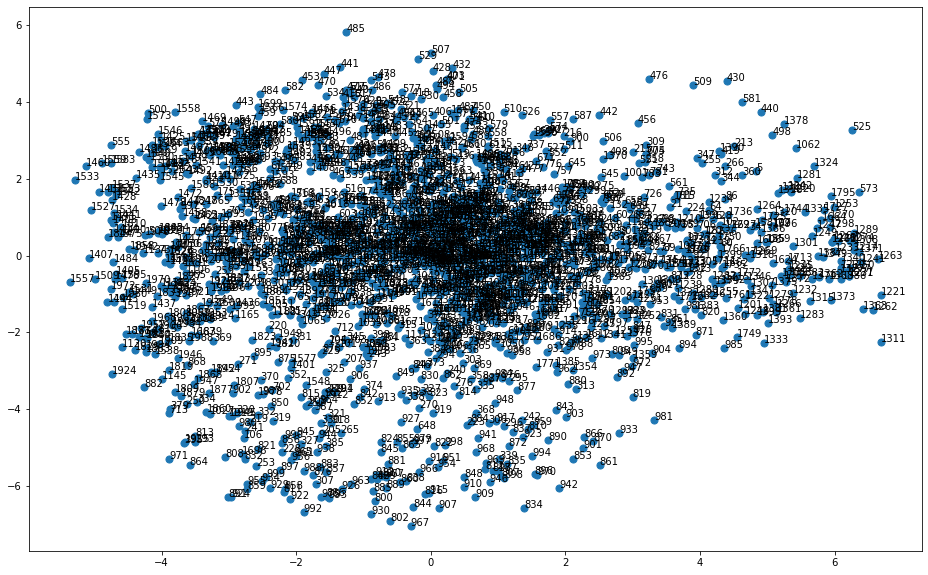

In [70]:
# Decomposition in singular value
u3, s3, vh3 = np.linalg.svd(data_kar_scale.values,full_matrices=False)

k=2

U_k=u3[:,0:k]
D_k=np.diag(s3[0:k])
V_k = vh3.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=data_kar.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

## File mfeat-zer

In [34]:
data_zer, data_zer_scale, zer_corrmat, zer_proportion, zer_corrVarComponent, eigenvalues_zer = PCA('mfeat-zer',' ', 'd', 47)

In [96]:
# Proportion with eigen value greater or equal than 1
zer_proportion

axe  eigen_values  proportion  pct_cumule
0     1     11.388886   24.231673   24.231673
1     2      6.963637   14.816249   39.047922
2     3      4.324854    9.201818   48.249740
3     4      3.809274    8.104839   56.354579
4     5      2.704506    5.754268   62.108847
5     6      2.154287    4.583590   66.692437
6     7      1.690648    3.597123   70.289560
7     8      1.496099    3.183190   73.472750
8     9      1.288663    2.741837   76.214586
9    10      1.194218    2.540890   78.755476
10   11      1.115832    2.374111   81.129588

In [ ]:
zer_corrVarComponent

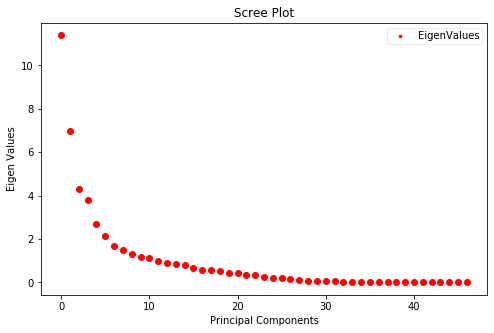

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(47)

plt.plot(sing_vals,eigenvalues_zer, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

We notice that, 11 axes have a eigen value greater or egal than 1. All this 11 axes allow the conservation of almost 81 percent of inertie in our data. It will not easy to analyse 11 compoments. As we know we can combine the coude rule and then take the 4 first components and get 56 percent of inertie.

#### Plot of data on our two data

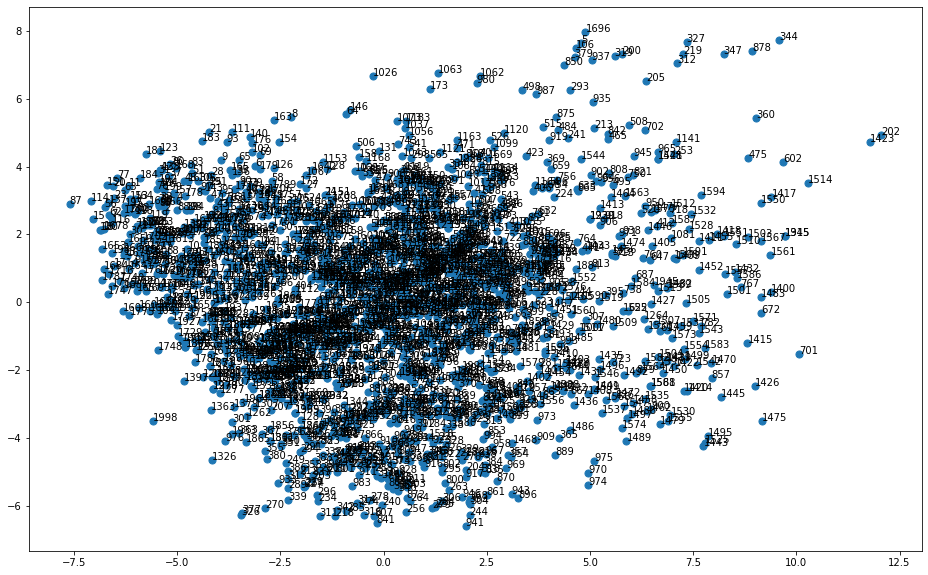

In [71]:
# Decomposition in singular value
u4, s4, vh4 = np.linalg.svd(data_zer_scale.values,full_matrices=False)

k=2

U_k=u4[:,0:k]
D_k=np.diag(s4[0:k])
V_k = vh4.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=data_zer.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

## File mfeat-pix

In [37]:
data_pix, data_pix_scale, pix_corrmat, pix_proportion, pix_corrVarComponent, eigenvalues_pix = PCA('mfeat-pix',' ', 'e', 240)

In [102]:
# Proportion with eigen value greater or equal than 1
pix_proportion

axe  eigen_values  proportion  pct_cumule
0     1     38.711392   16.129747   16.129747
1     2     23.434178    9.764241   25.893988
2     3     21.070930    8.779554   34.673542
3     4     15.141867    6.309111   40.982653
4     5     13.071404    5.446419   46.429072
5     6     10.242836    4.267848   50.696920
6     7      8.961783    3.734076   54.430996
7     8      7.225731    3.010721   57.441717
8     9      7.106756    2.961148   60.402866
9    10      6.017829    2.507429   62.910294
10   11      4.717092    1.965455   64.875750
11   12      4.424831    1.843680   66.719429
12   13      4.089342    1.703892   68.423322
13   14      3.732242    1.555101   69.978423
14   15      3.459768    1.441570   71.419992
15   16      3.146119    1.310883   72.730875
16   17      2.940066    1.225028   73.955903
17   18      2.721420    1.133925   75.089828
18   19      2.481963    1.034151   76.123979
19   20      2.400511    1.000213   77.124192
20   21      2.135865    0.889944   78.014136
21   22      1.946739    0.811141   78.825277
22   23      1.897935    0.790806   79.616083
23   24      1.814519    0.756050   80.372133
24   25      1.635836    0.681598   81.053731
25   26      1.467939    0.611641   81.665373
26   27      1.377241    0.573851   82.239223
27   28      1.231813    0.513255   82.752479
28   29      1.217846    0.507436   83.259914
29   30      1.144235    0.476764   83.736679
30   31      1.120121    0.466717   84.203396
31   32      1.112510    0.463546   84.666942
32   33      1.013212    0.422172   85.089114

In [39]:
pix_corrVarComponent

F1        F2        F3        F4        F5        F6        F7  \
e0   -0.366229 -0.101043 -0.028482 -0.006900  0.256960  0.136575  0.284459   
e1   -0.402473 -0.042767  0.025864 -0.047252  0.423308  0.182205  0.311689   
e2   -0.388708  0.090726  0.116115 -0.101238  0.523965  0.188119  0.265233   
e3   -0.365633  0.220197  0.189384 -0.177065  0.523618  0.194338  0.211370   
e4   -0.327644  0.336935  0.234611 -0.206615  0.450741  0.185434  0.137802   
...        ...       ...       ...       ...       ...       ...       ...   
e235  0.387657 -0.031664  0.017892 -0.069921  0.235602 -0.530805 -0.169255   
e236  0.353694 -0.176362  0.015205 -0.242662  0.248501 -0.534236 -0.083278   
e237  0.255971 -0.263897  0.010152 -0.355743  0.223545 -0.467658 -0.051305   
e238  0.147910 -0.307839  0.024016 -0.413658  0.180225 -0.371243 -0.015032   
e239  0.082112 -0.235015  0.062543 -0.359962  0.152717 -0.216203  0.034158   

            F8        F9       F10  ...       F24       F25       F26  \
e0    0.175254  0.113052 -0.086654  ... -0.052308  0.242645 -0.013468   
e1    0.174069  0.110957 -0.038111  ... -0.066573  0.252460  0.000893   
e2    0.173303  0.101549  0.009526  ... -0.053726  0.200417 -0.008316   
e3    0.162764  0.063297  0.002328  ... -0.009447  0.096111 -0.010931   
e4    0.110059  0.005790 -0.069383  ...  0.066567 -0.046813 -0.030523   
...        ...       ...       ...  ...       ...       ...       ...   
e235  0.161497 -0.052920 -0.282086  ... -0.022139 -0.066932  0.200310   
e236  0.053251 -0.182657 -0.214029  ... -0.130234 -0.057460  0.131356   
e237 -0.052903 -0.233523 -0.143456  ... -0.226506 -0.010244  0.015261   
e238 -0.133923 -0.205689 -0.113020  ... -0.274981  0.071901 -0.069684   
e239 -0.136412 -0.136621 -0.078306  ... -0.293545  0.111096 -0.111147   

           F27       F28       F29       F30       F31       F32       F33  
e0    0.011200 -0.179348  0.083018  0.059389 -0.101798  0.070602  0.118221  
e1    0.009994 -0.147041  0.081652  0.087481 -0.060756  0.065362  0.099215  
e2   -0.072866 -0.069841  0.009910  0.060659  0.034895  0.004719  0.055237  
e3   -0.177173 -0.020560 -0.089492  0.031564  0.120918 -0.042347 -0.004822  
e4   -0.208774  0.002620 -0.116049  0.028984  0.158323 -0.060493 -0.075696  
...        ...       ...       ...       ...       ...       ...       ...  
e235 -0.029788  0.100893 -0.021554  0.024442 -0.153578  0.072947 -0.022687  
e236 -0.048900  0.076281 -0.005564  0.040208 -0.134236  0.013607 -0.039925  
e237 -0.092834 -0.004135  0.037934  0.014913 -0.086947 -0.024530 -0.057557  
e238 -0.149338 -0.080750  0.070041 -0.028098  0.000997 -0.001706 -0.047448  
e239 -0.169990 -0.116345  0.071392 -0.044868  0.058693 -0.004658 -0.054682  

[240 rows x 33 columns]

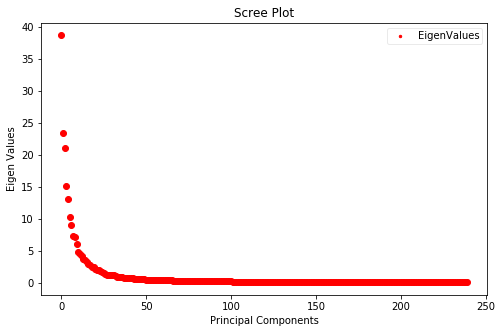

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(240)

plt.plot(sing_vals,eigenvalues_pix, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

We notice that, 33 axes have a eigen value greater or egal than 1. All this 33 axes allow the conservation of almost 85 percent of inertie in our data. It will not easy to analyse 33 compoments. As we know we can combine the coude rule and then take the 5 first components and get 46 percent of inertie.

#### Plot of data on our two first axes

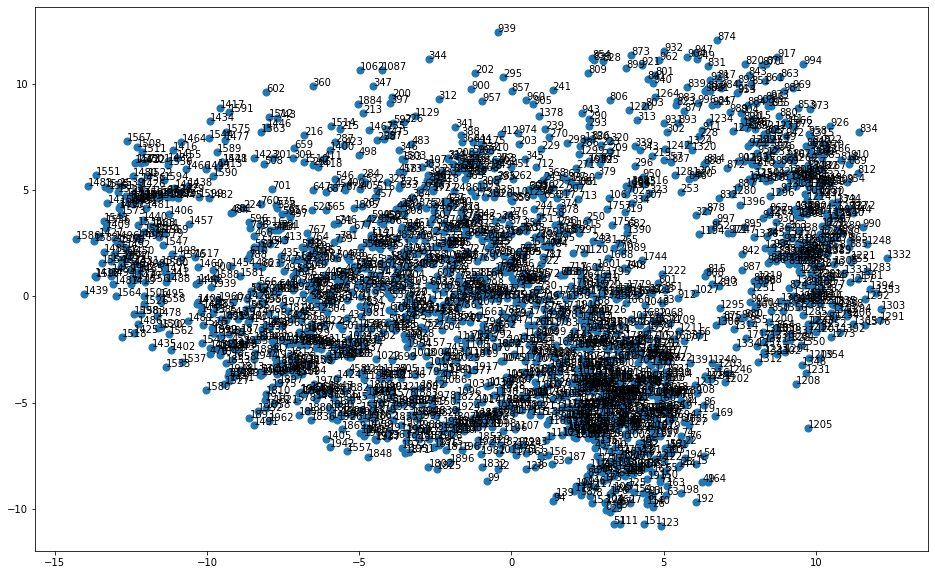

In [72]:
# Decomposition in singular value
u5, s5, vh5 = np.linalg.svd(data_pix_scale.values,full_matrices=False)

k=2

U_k=u5[:,0:k]
D_k=np.diag(s5[0:k])
V_k = vh5.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=data_pix.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

## File mfeat-mor

In [40]:
data_mor, data_mor_scale, mor_corrmat, mor_proportion, mor_corrVarComponent, eigenvalues_mor = PCA('mfeat-mor',' ', 'f', 6)

In [44]:
#Proportion
mor_proportion

axe  eigen_values  proportion  pct_cumule
0    1      3.464751   57.745850   57.745850
1    2      1.107489   18.458144   76.203994

In [45]:
# Correlation variable composant
mor_corrVarComponent

F1        F2
f0 -0.905043  0.274363
f1  0.869859  0.246069
f2 -0.306134  0.937007
f3  0.847002  0.098285
f4  0.896941  0.108520
f5  0.522838  0.268785

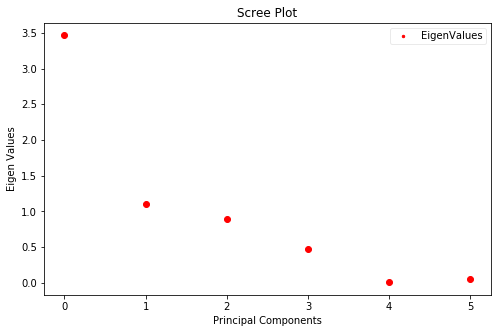

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(6)

plt.plot(sing_vals,eigenvalues_mor, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

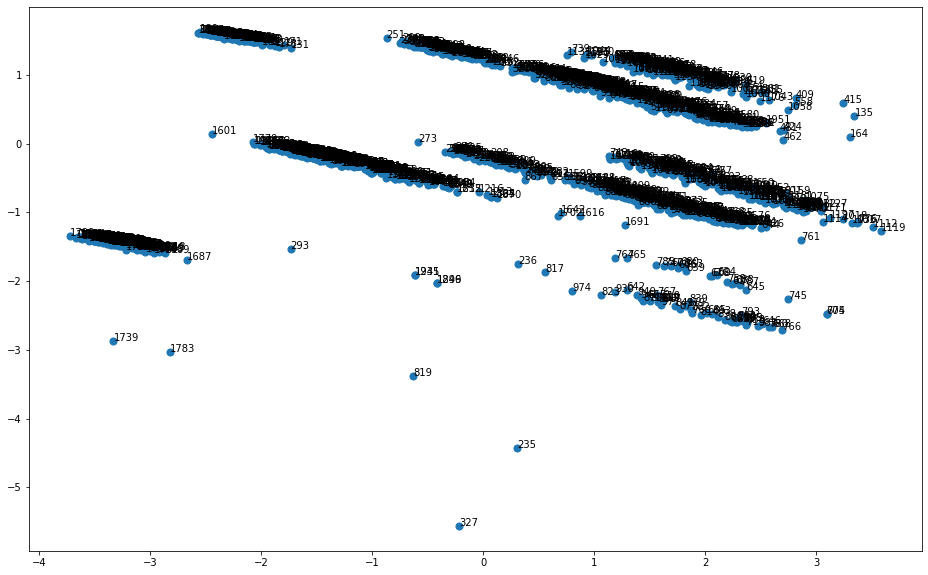

In [73]:
# Decomposition in singular value
u6, s6, vh6 = np.linalg.svd(data_mor_scale.values,full_matrices=False)

k=2

U_k=u6[:,0:k]
D_k=np.diag(s6[0:k])
V_k = vh6.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=data_mor.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

## ALL DATA

In [47]:
# Concatenation of data
data = pd.concat([mfeat_fac_scale, data_fou_scale, data_kar_scale, data_zer_scale, data_pix_scale, data_mor_scale], axis=1)
data

a_0       a_1       a_2       a_3       a_4       a_5       a_6  \
0    -1.906882 -0.792545 -0.864821 -0.472519 -0.683703 -0.409280 -1.537234   
1    -1.654897 -1.185503 -0.499318 -0.924348 -1.133232 -0.204481 -1.096765   
2    -1.720632 -1.660707 -0.581075 -0.968074 -1.705360 -0.636835 -0.656297   
3    -1.994529 -1.834339 -0.403133 -0.334055 -0.683703 -0.466169 -1.713421   
4    -1.260487 -1.423105 -0.143433 -0.523532 -1.092366 -0.193103 -1.008672   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.350023 -0.737714  1.039642 -0.815035 -1.562328 -0.102081  0.488920   
1996  0.569140  0.066478  1.001168 -0.181016 -0.642837  0.114096  0.753200   
1997  0.711566 -0.216817  0.678948 -0.100853 -1.214964 -0.261369  0.224639   
1998 -0.274460 -0.564081  0.746278 -0.764022 -1.541895 -0.773367  0.400826   
1999  0.908771  0.514267  0.751087  0.642480 -0.050276  0.626094  0.665107   

           a_7       a_8       a_9  ...      e236      e237      e238  \
0    -1.274927 -1.390649 -0.747721  ... -1.142357 -0.843050 -0.593126   
1    -1.274927 -1.503170 -1.237387  ... -1.142357 -0.843050 -0.593126   
2    -1.682990 -1.390649 -1.482221  ...  1.048690  0.272464  0.052981   
3    -1.682990 -1.278128 -0.992554  ... -1.142357 -0.843050 -0.593126   
4    -1.682990 -1.615692 -1.237387  ... -1.142357 -0.843050 -0.593126   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -0.186757 -1.728213 -0.502888  ...  1.048690 -0.843050 -0.593126   
1996 -0.322778 -0.828043 -0.013221  ... -1.142357 -0.843050 -0.593126   
1997 -0.594821 -0.603001  0.231612  ... -1.142357 -0.843050 -0.593126   
1998 -0.458799 -1.503170 -1.237387  ... -1.142357 -0.843050 -0.593126   
1999  0.221306  0.072126 -0.992554  ... -1.142357 -0.843050 -0.593126   

          e239       f0        f1        f2        f3        f4        f5  
0    -0.368213  0.76321 -1.517971 -1.019637 -0.930348 -1.125501 -1.017085  
1    -0.368213  0.76321 -1.517971 -1.019637 -1.187285 -1.156216 -1.021336  
2    -0.368213  0.76321 -1.517971 -1.019637 -1.009397 -1.100311 -1.037092  
3    -0.368213  0.76321 -1.517971 -1.019637 -1.077170 -1.265605 -0.987867  
4    -0.368213  0.76321 -1.517971 -1.019637 -1.165774 -1.063905 -1.006349  
...        ...      ...       ...       ...       ...       ...       ...  
1995 -0.368213  0.76321 -0.642303  0.409427  0.043182  0.055695  0.429805  
1996 -0.368213  0.76321 -0.642303  0.409427 -0.160497 -0.065989  0.397493  
1997 -0.368213  0.76321 -0.642303  0.409427 -0.869493 -0.334968 -0.178992  
1998 -0.368213  0.76321 -0.642303  0.409427 -0.539465 -0.731810 -0.041727  
1999 -0.368213  0.76321 -0.642303  0.409427 -0.899561 -0.257275 -0.162883  

[2000 rows x 649 columns]

In [48]:
# Scale data
data_scale = (data - data.mean())/data.std()
    
# Correlation matrix
corrmat = data_scale.corr()
corrmat

a_0       a_1       a_2       a_3       a_4       a_5       a_6  \
a_0  1.000000  0.503564  0.044639  0.281942  0.340413  0.124469  0.495113   
a_1  0.503564  1.000000  0.147405  0.216432  0.274847  0.288049  0.780144   
a_2  0.044639  0.147405  1.000000  0.055830  0.030394 -0.159355  0.181381   
a_3  0.281942  0.216432  0.055830  1.000000  0.175043  0.027913  0.031291   
a_4  0.340413  0.274847  0.030394  0.175043  1.000000  0.039995  0.118425   
..        ...       ...       ...       ...       ...       ...       ...   
f1   0.551118  0.539986  0.214293  0.153137  0.252855 -0.026385  0.592423   
f2  -0.062834 -0.236616  0.075976 -0.086698 -0.036404 -0.254442 -0.130309   
f3   0.271710  0.060332  0.113177  0.151985  0.205211  0.100485  0.164401   
f4   0.490107  0.208458  0.107917  0.227477  0.289448  0.148313  0.302729   
f5   0.525857  0.380609  0.069507  0.148901  0.218134  0.043455  0.389026   

          a_7       a_8       a_9  ...      e236      e237      e238  \
a_0  0.322912  0.454491  0.368102  ... -0.019690  0.068872  0.135218   
a_1  0.646216  0.535089  0.472714  ... -0.025873  0.079495  0.155395   
a_2  0.175989  0.081639  0.116051  ...  0.021010  0.056103  0.081506   
a_3  0.184469  0.453688  0.057276  ... -0.066966 -0.017477  0.044303   
a_4  0.179999  0.463299  0.213168  ...  0.128774  0.151635  0.172336   
..        ...       ...       ...  ...       ...       ...       ...   
f1   0.373286  0.336226  0.551778  ...  0.079320  0.184865  0.252545   
f2  -0.022392 -0.181255  0.074202  ... -0.020366 -0.057781 -0.102534   
f3  -0.022206  0.324659  0.161293  ...  0.049544  0.086228  0.122070   
f4   0.022582  0.445372  0.223607  ...  0.014184  0.074954  0.136684   
f5   0.211537  0.254322  0.275547  ...  0.033364  0.108404  0.167449   

         e239        f0        f1        f2        f3        f4        f5  
a_0  0.121232 -0.499728  0.551118 -0.062834  0.271710  0.490107  0.525857  
a_1  0.132789 -0.584420  0.539986 -0.236616  0.060332  0.208458  0.380609  
a_2  0.074311 -0.144906  0.214293  0.075976  0.113177  0.107917  0.069507  
a_3  0.090169 -0.174389  0.153137 -0.086698  0.151985  0.227477  0.148901  
a_4  0.168496 -0.232157  0.252855 -0.036404  0.205211  0.289448  0.218134  
..        ...       ...       ...       ...       ...       ...       ...  
f1   0.206541 -0.850143  1.000000 -0.001067  0.616539  0.674785  0.472023  
f2  -0.085739  0.516263 -0.001067  1.000000 -0.143836 -0.164682 -0.032200  
f3   0.114711 -0.609249  0.616539 -0.143836  1.000000  0.937760  0.219574  
f4   0.136746 -0.666205  0.674785 -0.164682  0.937760  1.000000  0.336861  
f5   0.163799 -0.419968  0.472023 -0.032200  0.219574  0.336861  1.000000  

[649 rows x 649 columns]

In [49]:
# Eigen values and eigen vectors
eigenvalues_all, eigenvectors_all = LA.eig(corrmat)
    
# Proportion table for eigen values greater or equal than 1
axe = np.arange(len(eigenvalues_all))+1
proportion = np.array([axe, eigenvalues_all])
proportion_dic = {'axe' : np.arange(len(eigenvalues_all))+1,
    'eigen_values' : eigenvalues_all
    }
proportion = pd.DataFrame(proportion_dic)
proportion['proportion'] = proportion['eigen_values']/proportion['eigen_values'].sum()*100
proportion['pct_cumule'] = proportion['proportion'].cumsum()
proportion = proportion[proportion['eigen_values']>=1]
proportion

axe  eigen_values  proportion  pct_cumule
0    1     90.624148   13.963659   13.963659
1    2     61.728583    9.511338   23.474997
2    3     49.701810    7.658214   31.133211
3    4     34.542263    5.322383   36.455594
4    5     30.297583    4.668349   41.123943
5    6     24.139284    3.719458   44.843401
6    7     21.072476    3.246915   48.090315
7    8     16.966581    2.614265   50.704581
8    9     15.277843    2.354059   53.058640
9   10     14.236249    2.193567   55.252207

In [112]:
# correlation component variables
corrVarComponent= np.sqrt(eigenvalues)*eigenvectors*-1
corrVarComponent = pd.DataFrame(corrVarComponent)
corrVarComponent.columns = ['F'+str(i+1) for i in range(data.shape[1])]
corrVarComponent = corrVarComponent.set_index(data.columns)
component = ['F'+str(i+1) for i in range(proportion.shape[0])]
corrVarComponent = corrVarComponent[component]
corrVarComponent

F1        F2        F3        F4        F5        F6        F7  \
a_0 -0.317375  0.548196 -0.083598 -0.426829 -0.145146 -0.390381 -0.008206   
a_1 -0.600064  0.668102 -0.105266  0.039144  0.089773  0.051138 -0.030653   
a_2 -0.054296  0.220371 -0.111775 -0.028144 -0.049045  0.212505  0.210673   
a_3 -0.084213  0.309678  0.307253 -0.300742  0.014329  0.022753  0.171574   
a_4 -0.061033  0.470676  0.381396 -0.004425 -0.175158 -0.114104 -0.109202   
..        ...       ...       ...       ...       ...       ...       ...   
f1  -0.339174  0.551615 -0.254944 -0.147919 -0.333911 -0.049622  0.001606   
f2   0.291840  0.036905 -0.174863  0.111387 -0.095820  0.126261  0.218978   
f3  -0.267011  0.060001  0.172092 -0.214368 -0.564964  0.045783  0.037884   
f4  -0.333298  0.208159  0.185393 -0.295535 -0.555493 -0.109945 -0.003253   
f5  -0.193128  0.429658 -0.119232 -0.222120 -0.138484 -0.207945 -0.112730   

           F8        F9       F10  ...       F74       F75       F76  \
a_0  0.223516  0.046799 -0.018283  ... -0.040266  0.031669  0.025025   
a_1  0.009118 -0.168132 -0.025834  ...  0.013164 -0.018969 -0.008367   
a_2 -0.114411  0.037744  0.267294  ... -0.011743 -0.041127 -0.031917   
a_3  0.030842 -0.139668  0.034000  ... -0.031410 -0.026237 -0.095797   
a_4  0.057201  0.055661 -0.244153  ... -0.010205  0.053292 -0.020669   
..        ...       ...       ...  ...       ...       ...       ...   
f1  -0.219452  0.060542 -0.081198  ... -0.016679  0.016814  0.011572   
f2   0.245714  0.167215  0.104294  ... -0.067794 -0.059232 -0.011690   
f3  -0.177184  0.116671 -0.002123  ...  0.029027  0.042147 -0.009658   
f4  -0.092700  0.117903  0.111696  ...  0.022231  0.039752 -0.008951   
f5   0.012657 -0.028660  0.007127  ... -0.003005 -0.057612 -0.031738   

          F77       F78       F79       F80       F81       F82       F83  
a_0 -0.027514  0.007641 -0.014953 -0.020278 -0.002231 -0.019830 -0.011620  
a_1 -0.015943  0.007569  0.001826 -0.000793  0.005986 -0.014973 -0.016869  
a_2  0.083034 -0.061754 -0.009696  0.020427 -0.046774  0.025171  0.039225  
a_3  0.079646  0.065004  0.108687  0.036593  0.000939  0.122499 -0.047951  
a_4 -0.018444  0.027378  0.000407  0.013330 -0.012300  0.014199  0.047616  
..        ...       ...       ...       ...       ...       ...       ...  
f1  -0.002018  0.006518 -0.035275  0.042613 -0.024401 -0.022299 -0.023310  
f2   0.033078  0.004472  0.083675  0.021155  0.002241 -0.059371 -0.018015  
f3   0.001148  0.000002 -0.053022  0.034053 -0.030288 -0.029480 -0.027928  
f4  -0.003362 -0.001370 -0.051458  0.025863 -0.020842 -0.028940 -0.028756  
f5  -0.064796 -0.002709 -0.060423  0.020091 -0.012247 -0.055787 -0.014624  

[649 rows x 83 columns]

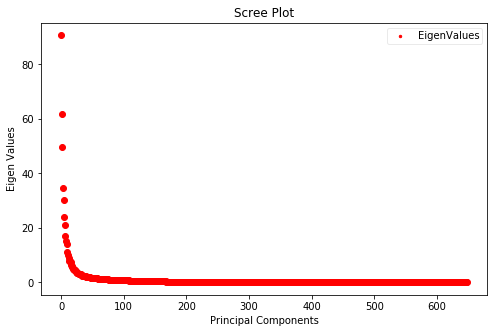

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))

sing_vals = np.arange(649)

plt.plot(sing_vals,eigenvalues_all, 'ro',linewidth = 2)

plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

leg = plt.legend(['EigenValues'], loc = 'best', borderpad = 0.3,
                shadow = False,
                markerscale = 0.4)
leg.get_frame().set_alpha(0.4)

plt.show()

We notice that, 83 axes have a eigen value greater or egal than 1. All this 83 axes allow the conservation of almost 86 percent of inertie in our data. It will not easy to analyse 83 compoments. As we know we can combine the coude rule and then take the 5 first components and get 41 percent of inertie.

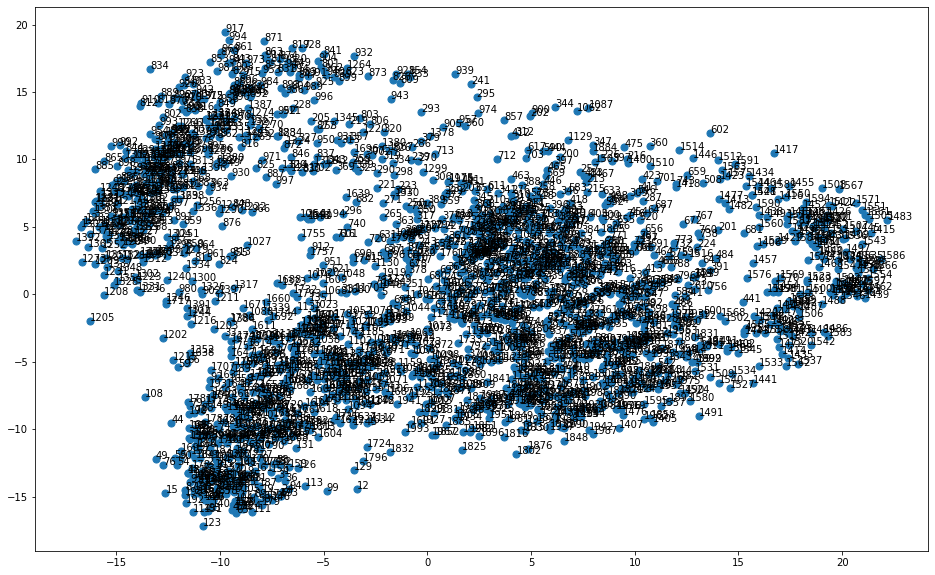

In [74]:
# Decomposition in singular value
u7, s7, vh7 = np.linalg.svd(data_scale.values,full_matrices=False)

k=2

U_k=u7[:,0:k]
D_k=np.diag(s7[0:k])
V_k = vh7.T[:,0:k]
Z_k=np.matmul(U_k,D_k)

#Visulisation in 2D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=50)
txt=data.index

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

 $$ \textbf{SUMMARY} $$

<table>
    <tr>
       <td style="border:none">
           <h1>Data</h1>
       </td>
       <td style="border:none">
           <h1>Number of PC's</h1>
       </td>
       <td style="border:none">
           <h1>Inertia proportion of PC's</h1>
       </td>
    </tr>
    <tr>
       <td style="border:none">
           <h3>mfeat-fac</h3>
       </td>
       <td style="border:none">
           <h3>3</h3>
       </td>
       <td style="border:none">
           <h3>43.63 %</h3>
       </td>
    </tr>
    <tr>
       <td style="border:none">
           <h3>mfeat-fou</h3>
       </td>
       <td style="border:none">
           <h3>3</h3>
       </td>
       <td style="border:none">
           <h3>28.63 %</h3>
       </td>   
    </tr>
    <tr>
       <td style="border:none">
               <h3>mfeat-kar</h3>
       </td>
       <td style="border:none">
           <h3>4</h3>
       </td>
       <td style="border:none">
           <h3>27.57 %</h3>
       </td>
    </tr>
    <tr>
       <td style="border:none">
           <h3>mfeat-zer</h3>
       </td>
       <td style="border:none">
           <h3>4</h3>
       </td>
       <td style="border:none">
           <h3>56.35 %</h3>
       </td>
    </tr>
    <tr>
       <td style="border:none">
           <h3>mfeat-mor</h3>
       </td>
       <td style="border:none">
           <h3>2</h3>
       </td>
       <td style="border:none">
           <h3>76.20 %</h3>
       </td>
    </tr>
    <tr>
       <td style="border:none">
           <h3>mfeat-pix</h3>
       </td>
       <td style="border:none">
           <h3>5</h3>
       </td>
       <td style="border:none">
           <h3>46.42 %</h3>
       </td>
    </tr>
    <tr>
       <td style="border:none">
           <h3>mfeat-All</h3>
       </td>
       <td style="border:none">
           <h3>5</h3>
       </td>
       <td style="border:none">
           <h3>41.12 %</h3>
       </td>
    </tr>
</table>

# Clustering

In [117]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
%matplotlib inline

## file mfeat_fac

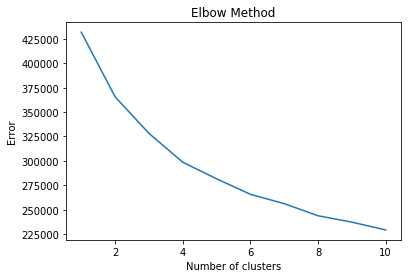

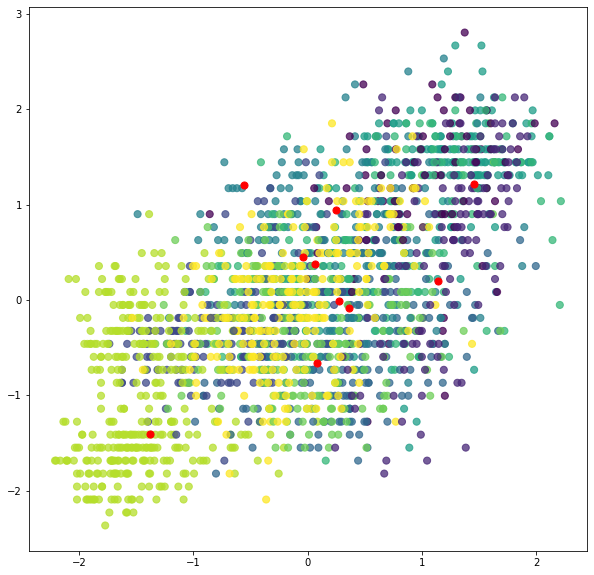

In [116]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++',max_iter = 10,n_init =10, random_state =0)
    kmeans.fit(mfeat_fac_scale)
    error.append(kmeans.inertia_)
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0).fit(mfeat_fac_scale)
labels = kmeans.labels_

# our centroids
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(mfeat_fac_scale['a_1'], mfeat_fac_scale['a_7'],
            c=kmeans.labels_.astype(float), s=50, alpha=0.75)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [118]:
def Cluster(data, letter):
    
    error = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters =i, init = 'k-means++',max_iter = 10,n_init =10, random_state =0)
        kmeans.fit(mfeat_fac_scale)
        error.append(kmeans.inertia_)
    plt.plot(range(1,11),error)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    plt.show()
    
    
    kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
    labels = kmeans.labels_

# our centroids
    centroids = kmeans.cluster_centers_
    fig, ax = plt.subplots(figsize=(10, 10))
    plt1.scatter(data[letter+'1'], data[letter+'5'],
            c=kmeans.labels_.astype(float), s=50, alpha=0.75)
    plt1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    return np.unique(labels, return_counts=True),'\n', plt1

## File mfeat_fou

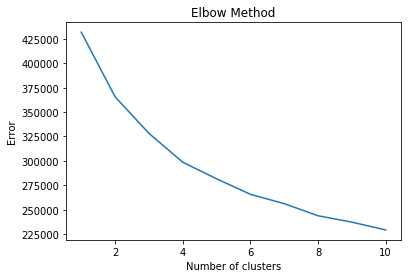

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
  array([160, 217, 182, 231, 167, 338, 196,  99, 229, 181])),
 '\n',
 <module 'matplotlib.pyplot' from '/home/yvan_bm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

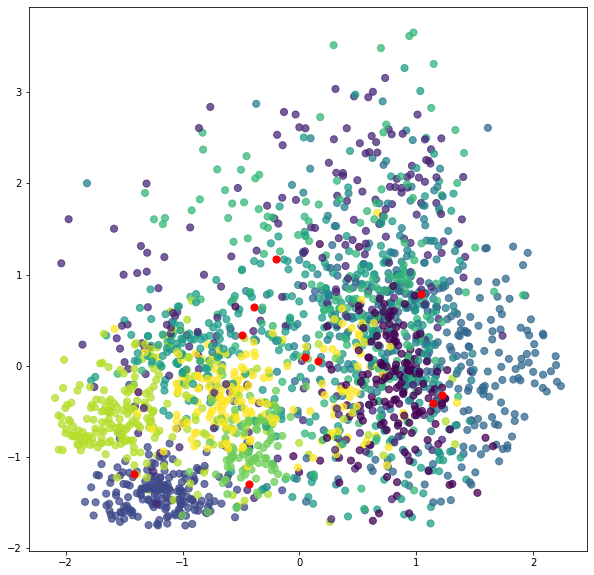

In [119]:
Cluster(data_fou_scale, 'b')

## File mfeat-kar

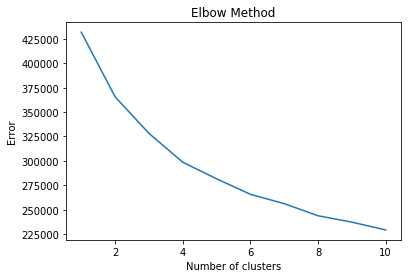

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
  array([172, 229, 184, 242, 181, 185, 177, 180, 193, 257])),
 '\n',
 <module 'matplotlib.pyplot' from '/home/yvan_bm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

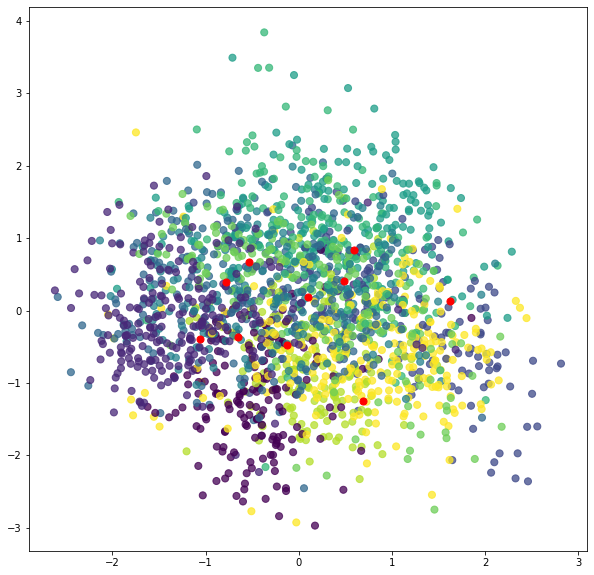

In [120]:
Cluster(data_kar_scale, 'c')

## File mfeat-zer

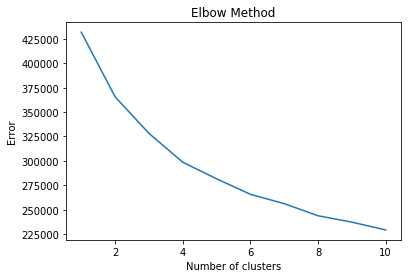

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
  array([259, 142,  99, 175, 221, 174, 223, 110, 258, 339])),
 '\n',
 <module 'matplotlib.pyplot' from '/home/yvan_bm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

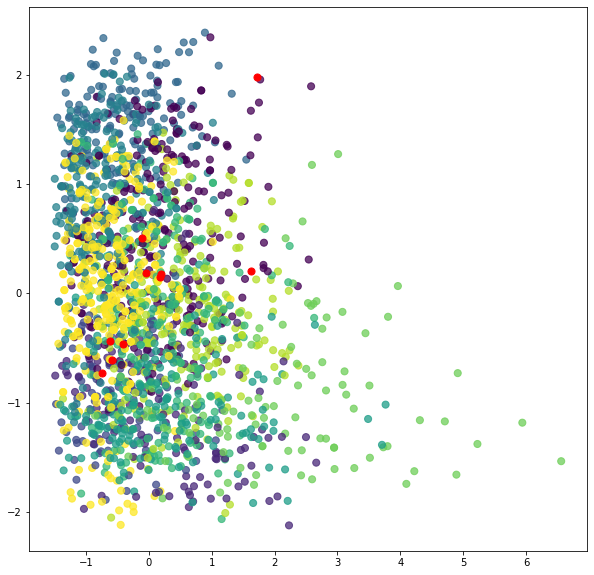

In [121]:
Cluster(data_zer_scale, 'd')

## File mfeat-pix

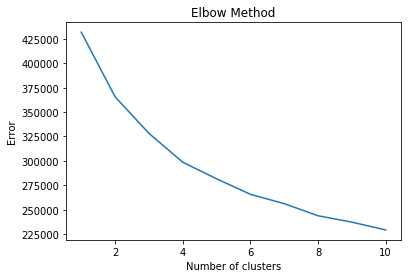

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
  array([142, 178, 189, 225, 160, 179, 360, 209, 184, 174])),
 '\n',
 <module 'matplotlib.pyplot' from '/home/yvan_bm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

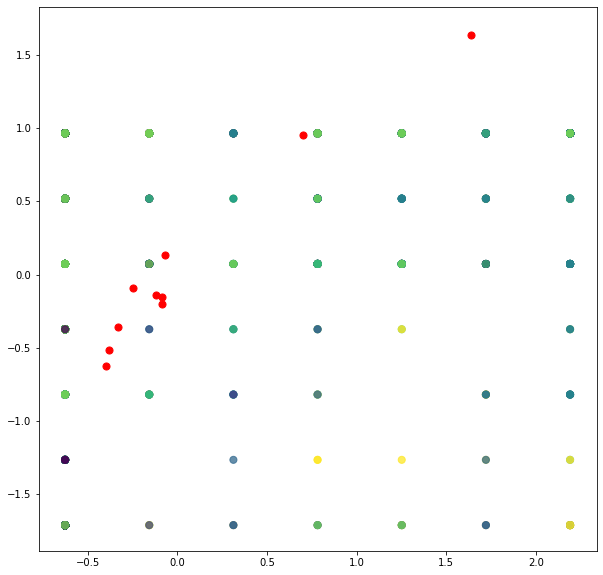

In [122]:
Cluster(data_pix_scale, 'e')

## File mfeat-mor

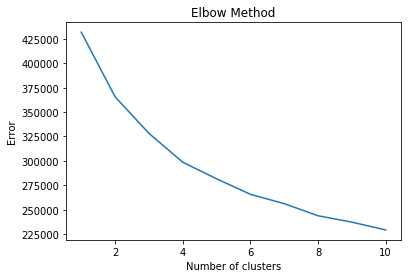

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
  array([204, 399, 259, 192, 215, 182, 197, 120,  96, 136])),
 '\n',
 <module 'matplotlib.pyplot' from '/home/yvan_bm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

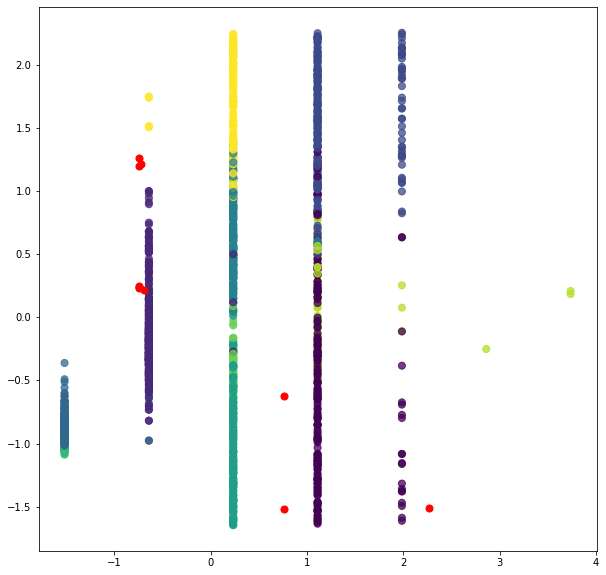

In [123]:
Cluster(data_mor_scale, 'f')

## ALL DATA

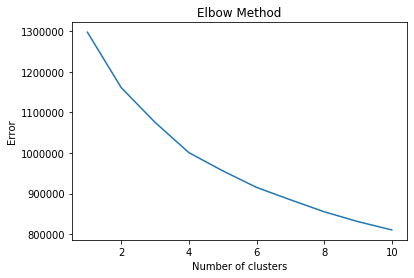

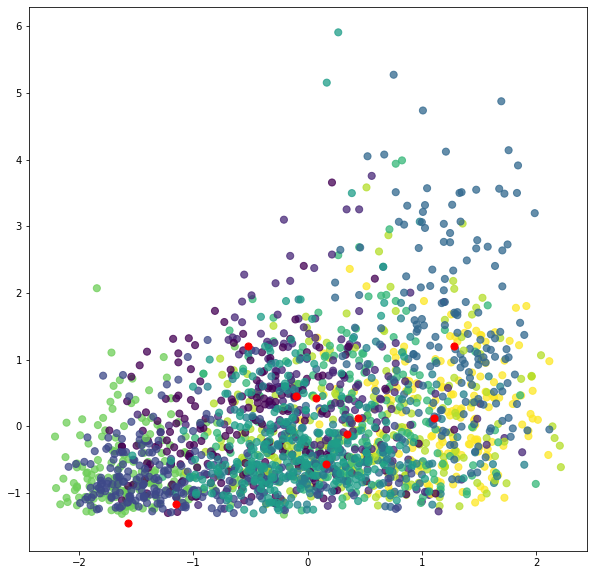

In [131]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++',max_iter = 10,n_init =10, random_state =0)
    kmeans.fit(data_scale)
    error.append(kmeans.inertia_)
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0).fit(data_scale)
labels = kmeans.labels_

# our centroids
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data_scale['a_1'], data_scale['d7'],
            c=kmeans.labels_.astype(float), s=50, alpha=0.75)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)